<a href="https://colab.research.google.com/github/RishabhNegi1/Research-Stock-Prediction/blob/main/TSLA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 - 4s - 87ms/step - loss: 0.0618
Epoch 2/50
44/44 - 1s - 14ms/step - loss: 0.0319
Epoch 3/50
44/44 - 0s - 7ms/step - loss: 0.0133
Epoch 4/50
44/44 - 1s - 16ms/step - loss: 0.0125
Epoch 5/50
44/44 - 1s - 17ms/step - loss: 0.0183
Epoch 6/50
44/44 - 0s - 8ms/step - loss: 0.0155
Epoch 7/50
44/44 - 0s - 9ms/step - loss: 0.0140
Epoch 8/50
44/44 - 0s - 9ms/step - loss: 0.0129
Epoch 9/50
44/44 - 0s - 9ms/step - loss: 0.0117
Epoch 10/50
44/44 - 1s - 12ms/step - loss: 0.0112
Epoch 11/50
44/44 - 1s - 16ms/step - loss: 0.0110
Epoch 12/50
44/44 - 1s - 14ms/step - loss: 0.0110
Epoch 13/50
44/44 - 0s - 8ms/step - loss: 0.0117
Epoch 14/50
44/44 - 1s - 14ms/step - loss: 0.0114
Epoch 15/50
44/44 - 0s - 8ms/step - loss: 0.0097
Epoch 16/50
44/44 - 0s - 9ms/step - loss: 0.0089
Epoch 17/50
44/44 - 1s - 14ms/step - loss: 0.0097
Epoch 18/50
44/44 - 1s - 14ms/step - loss: 0.0099
Epoch 19/50
44/44 - 1s - 14ms/step - loss: 0.0089
Epoch 20/50
44/44 - 1s - 16ms/step - loss: 0.0097
Epoch 21/50
44/44 - 1s - 12m

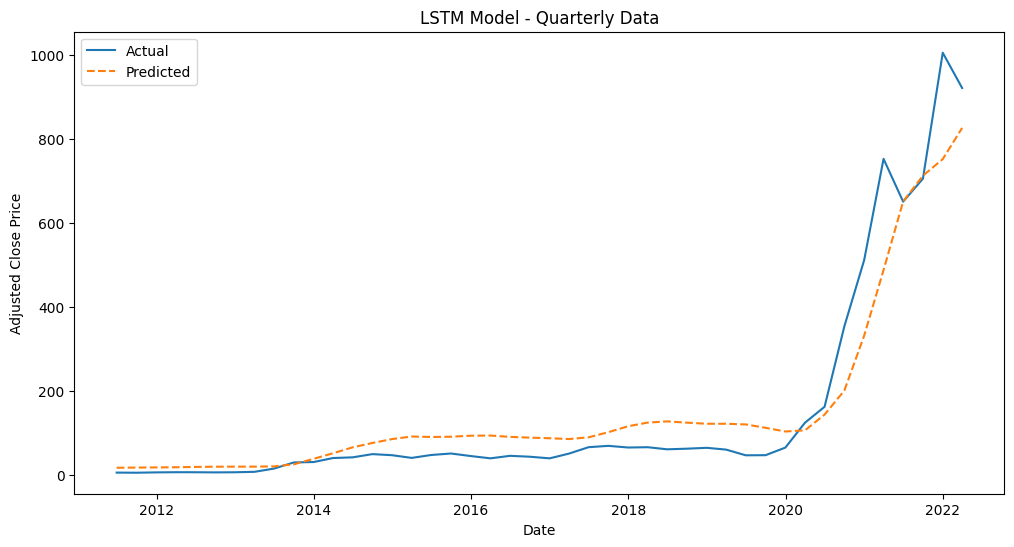

Quarterly Data - MAE: 50.199756342028834
Quarterly Data - RMSE: 76.4978607275731
Quarterly Forecast: [[850.809  ]
 [875.7111 ]
 [889.89685]
 [891.2011 ]]
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 - 3s - 244ms/step - loss: 0.1501
Epoch 2/50
11/11 - 0s - 7ms/step - loss: 0.1379
Epoch 3/50
11/11 - 0s - 12ms/step - loss: 0.1251
Epoch 4/50
11/11 - 0s - 6ms/step - loss: 0.1111
Epoch 5/50
11/11 - 0s - 6ms/step - loss: 0.1039
Epoch 6/50
11/11 - 0s - 12ms/step - loss: 0.0966
Epoch 7/50
11/11 - 0s - 5ms/step - loss: 0.0945
Epoch 8/50
11/11 - 0s - 6ms/step - loss: 0.0894
Epoch 9/50
11/11 - 0s - 5ms/step - loss: 0.0874
Epoch 10/50
11/11 - 0s - 6ms/step - loss: 0.0826
Epoch 11/50
11/11 - 0s - 5ms/step - loss: 0.0767
Epoch 12/50
11/11 - 0s - 5ms/step - loss: 0.0730
Epoch 13/50
11/11 - 0s - 5ms/step - loss: 0.0700
Epoch 14/50
11/11 - 0s - 4ms/step - loss: 0.0681
Epoch 15/50
11/11 - 0s - 5ms/step - loss: 0.0576
Epoch 16/50
11/11 - 0s - 6ms/step - loss: 0.0581
Epoch 17/50
11/11 - 0s - 5ms/step - loss: 0.0508
Epoch 18/50
11/11 - 0s - 6ms/step - loss: 0.0464
Epoch 19/50
11/11 - 0s - 6ms/step - loss: 0.0416
Epoch 20/50
11/11 - 0s - 6ms/step - loss: 0.0376
Epoch 21/50
11/11 - 0s - 6ms/step - 

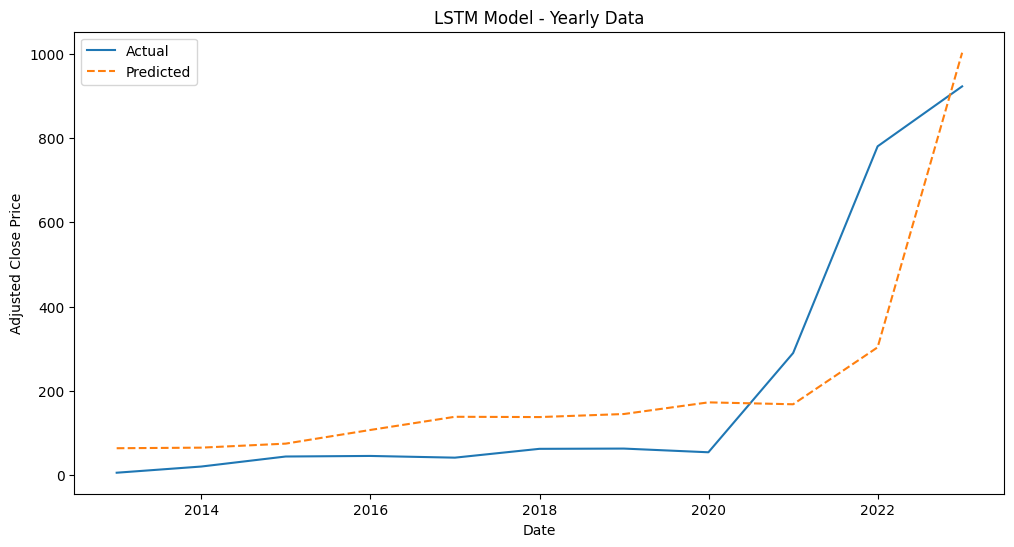

Yearly Data - MAE: 113.19075420891485
Yearly Data - RMSE: 163.48635767947445
Yearly Forecast: [[1930.0792]
 [2807.9998]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('/content/TSLA.csv')

# Convert Date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to get quarterly and yearly data
quarterly_data = data['Adj Close'].resample('Q').mean()
yearly_data = data['Adj Close'].resample('Y').mean()

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
quarterly_data_scaled = scaler.fit_transform(quarterly_data.values.reshape(-1, 1))
yearly_data_scaled = scaler.fit_transform(yearly_data.values.reshape(-1, 1))

# Prepare the quarterly dataset for LSTM
look_back = 4  # Look back 4 quarters (1 year)
X_quarterly, Y_quarterly = create_dataset(quarterly_data_scaled, look_back)
X_quarterly = np.reshape(X_quarterly, (X_quarterly.shape[0], X_quarterly.shape[1], 1))

# Build the LSTM model for quarterly data
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_quarterly, Y_quarterly, epochs=50, batch_size=1, verbose=2)

# Make predictions
quarterly_forecasted_values_scaled = model.predict(X_quarterly)
quarterly_forecasted_values = scaler.inverse_transform(quarterly_forecasted_values_scaled)

# Forecast the next 4 quarters
X_input = quarterly_data_scaled[-look_back:].reshape((1, look_back, 1))
forecast_quarterly_scaled = []
for i in range(4):
    predicted_scaled = model.predict(X_input)
    forecast_quarterly_scaled.append(predicted_scaled[0, 0])
    X_input = np.append(X_input[:, 1:, :], predicted_scaled.reshape(1, 1, 1), axis=1)

forecast_quarterly = scaler.inverse_transform(np.array(forecast_quarterly_scaled).reshape(-1, 1))

# Calculate error metrics for quarterly data
mae_quarterly = mean_absolute_error(quarterly_data[look_back:], quarterly_forecasted_values)
rmse_quarterly = np.sqrt(mean_squared_error(quarterly_data[look_back:], quarterly_forecasted_values))

# Plot actual vs predicted for quarterly data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index[look_back:], quarterly_data[look_back:], label='Actual')
plt.plot(quarterly_data.index[look_back:], quarterly_forecasted_values, label='Predicted', linestyle='--')
plt.title('LSTM Model - Quarterly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Quarterly Data - MAE:", mae_quarterly)
print("Quarterly Data - RMSE:", rmse_quarterly)
print("Quarterly Forecast:", forecast_quarterly)

# Prepare the yearly dataset for LSTM
look_back_yearly = 2  # Look back 2 years
X_yearly, Y_yearly = create_dataset(yearly_data_scaled, look_back_yearly)
X_yearly = np.reshape(X_yearly, (X_yearly.shape[0], X_yearly.shape[1], 1))

# Build the LSTM model for yearly data
model_yearly = Sequential()
model_yearly.add(LSTM(50, return_sequences=True, input_shape=(look_back_yearly, 1)))
model_yearly.add(LSTM(50))
model_yearly.add(Dense(1))
model_yearly.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_yearly.fit(X_yearly, Y_yearly, epochs=50, batch_size=1, verbose=2)

# Make predictions
yearly_forecasted_values_scaled = model_yearly.predict(X_yearly)
yearly_forecasted_values = scaler.inverse_transform(yearly_forecasted_values_scaled)

# Forecast the next 2 years
X_input_yearly = yearly_data_scaled[-look_back_yearly:].reshape((1, look_back_yearly, 1))
forecast_yearly_scaled = []
for i in range(2):
    predicted_scaled = model_yearly.predict(X_input_yearly)
    forecast_yearly_scaled.append(predicted_scaled[0, 0])
    X_input_yearly = np.append(X_input_yearly[:, 1:, :], predicted_scaled.reshape(1, 1, 1), axis=1)

forecast_yearly = scaler.inverse_transform(np.array(forecast_yearly_scaled).reshape(-1, 1))

# Calculate error metrics for yearly data
mae_yearly = mean_absolute_error(yearly_data[look_back_yearly:], yearly_forecasted_values)
rmse_yearly = np.sqrt(mean_squared_error(yearly_data[look_back_yearly:], yearly_forecasted_values))

# Plot actual vs predicted for yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index[look_back_yearly:], yearly_data[look_back_yearly:], label='Actual')
plt.plot(yearly_data.index[look_back_yearly:], yearly_forecasted_values, label='Predicted', linestyle='--')
plt.title('LSTM Model - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Yearly Data - MAE:", mae_yearly)
print("Yearly Data - RMSE:", rmse_yearly)
print("Yearly Forecast:", forecast_yearly)
